In [ ]:
!wget https://drive.google.com/uc?id=1bD-p4S32lAGjkxzD6MZzt9zDXyLU4Urs -O bike_sharing.csv

--2025-02-05 19:00:00--  https://drive.google.com/uc?id=1bD-p4S32lAGjkxzD6MZzt9zDXyLU4Urs
Resolving drive.google.com (drive.google.com)... 173.194.217.102, 173.194.217.101, 173.194.217.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bD-p4S32lAGjkxzD6MZzt9zDXyLU4Urs [following]
--2025-02-05 19:00:00--  https://drive.usercontent.google.com/download?id=1bD-p4S32lAGjkxzD6MZzt9zDXyLU4Urs
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [application/octet-stream]
Saving to: ‘bike_sharing.csv’

bike_sharing.csv    100%[===================>] 633.16K  --.-KB/s    in 0.01s   

2025-02-05 19:00:02 (58.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
yulu = pd.read_csv('bike_sharing.csv')
yulu.shape

(10886, 12)

In [ ]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
def is_palindrome(text):

    processed_text = "".join(ch for ch in text if ch.isalnum()).lower()  # Remove non-alphanumeric chars, lowercase
    return processed_text == processed_text[::-1]
is_palindrome('sosos')

True

In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
yulu.nunique().rename('Distinct Values').reset_index()

,index,Distinct Values
0,datetime,10886
1,season,4
2,holiday,2
3,workingday,2
4,weather,4
5,temp,49
6,atemp,60
7,humidity,89
8,windspeed,28
9,casual,309


In [ ]:
yulu.duplicated().sum()

0

In [ ]:
yulu.datetime = pd.to_datetime(yulu.datetime)

# Renaming 'count' column to 'total_rentals'
yulu.rename(columns={"count": "total_rentals"}, inplace=True)



yulu["season"] = yulu["season"].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

yulu["workingday"] = yulu["workingday"].replace({1: "working", 0: "non-working"})


yulu['holiday'] =yulu['holiday'].replace({1: "holiday", 0: "non-holiday"})


yulu['weather'] = yulu['weather'].replace({
    1: "clear or cloudy",
    2: "misty and cloudy",
    3: "thunderstorm, light rain or snow",
    4: "fog, heavy rain, ice pellets or snow",
})
yulu['date'] = yulu['datetime'].dt.date
yulu['time'] = yulu['datetime'].dt.time
yulu.date = pd.to_datetime(yulu.date)
yulu = yulu.drop(columns=['datetime'])

In [ ]:
yulu.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,date,time
0,spring,non-holiday,non-working,clear or cloudy,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,spring,non-holiday,non-working,clear or cloudy,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,spring,non-holiday,non-working,clear or cloudy,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,spring,non-holiday,non-working,clear or cloudy,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,spring,non-holiday,non-working,clear or cloudy,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


In [ ]:
yulu.isna().sum()

,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0
registered,0


In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   season         10886 non-null  object        
 1   holiday        10886 non-null  object        
 2   workingday     10886 non-null  object        
 3   weather        10886 non-null  object        
 4   temp           10886 non-null  float64       
 5   atemp          10886 non-null  float64       
 6   humidity       10886 non-null  int64         
 7   windspeed      10886 non-null  float64       
 8   casual         10886 non-null  int64         
 9   registered     10886 non-null  int64         
 10  total_rentals  10886 non-null  int64         
 11  date           10886 non-null  datetime64[ns]
 12  time           10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 1.1+ MB


**UNI_VARIATE ANALYSIS**

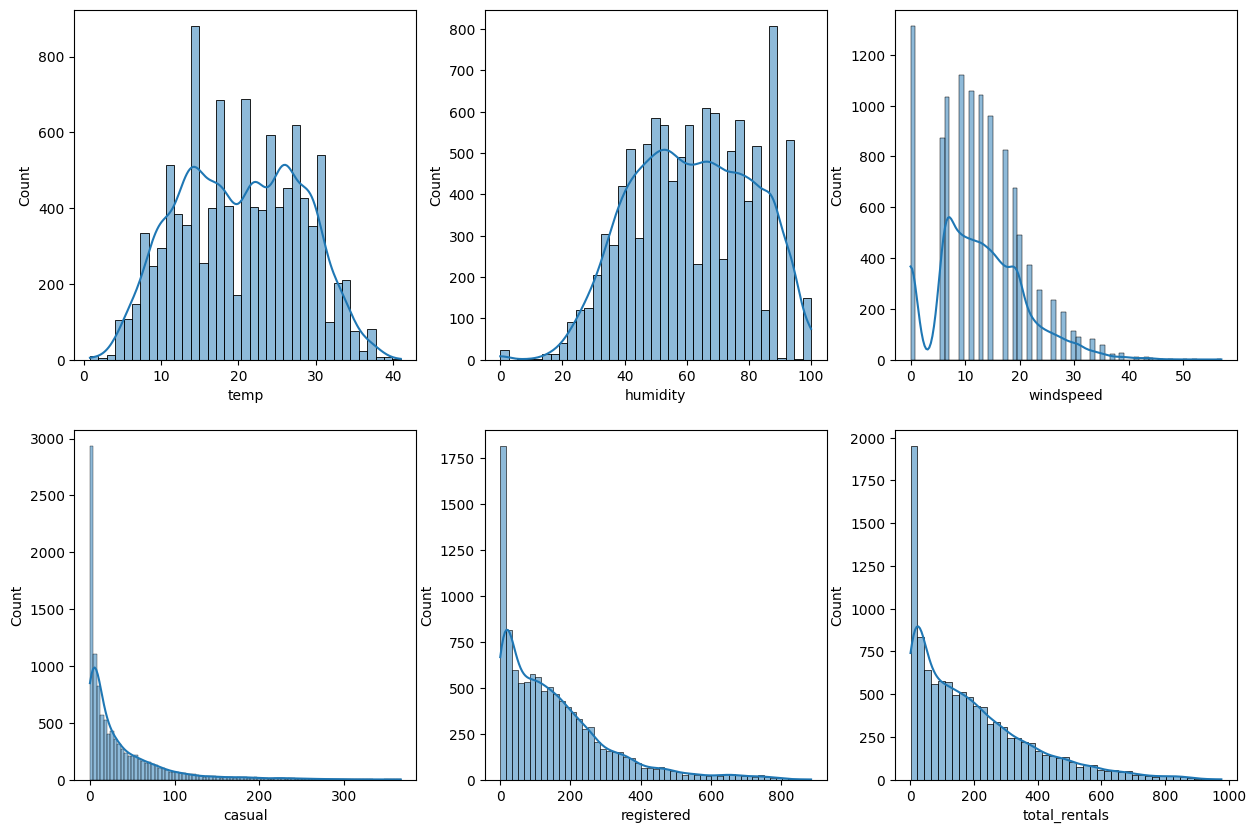

In [ ]:
columns_cat=['temp', 'humidity', 'windspeed', 'casual', 'registered','total_rentals']

fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(15,10))

index=0
for row in range(2):
  for col in range(3):
    sns.histplot(yulu[columns_cat[index]],ax=axis[row,col],kde=True)
    index += 1
plt.show()

# **Bi-Variate Analysis**

In [ ]:
yulu['holiday'].value_counts(normalize=True) * 100

,proportion
holiday,
non-holiday,97.14312
holiday,2.85688


In [ ]:
yulu['workingday'].value_counts(normalize=True) * 100

,proportion
workingday,
working,68.087452
non-working,31.912548


<Axes: xlabel='holiday', ylabel='count'>

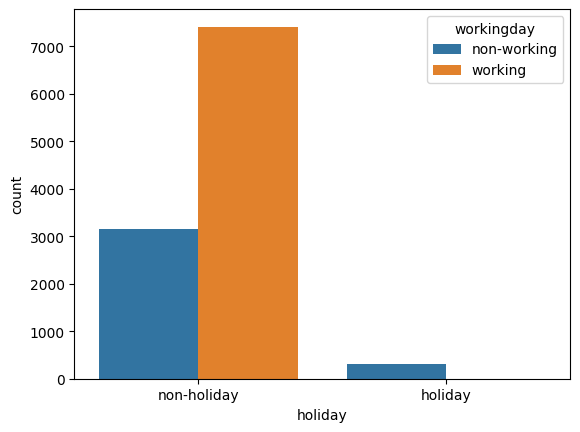

In [ ]:
sns.countplot(x = yulu['holiday'], hue = yulu['workingday'])

In [ ]:
yulu['season'].value_counts()

,count
season,
winter,2734
summer,2733
fall,2733
spring,2686


In [ ]:
yulu.groupby('season')['total_rentals'].sum()

,total_rentals
season,
fall,640662
spring,312498
summer,588282
winter,544034


<Axes: xlabel='workingday', ylabel='total_rentals'>

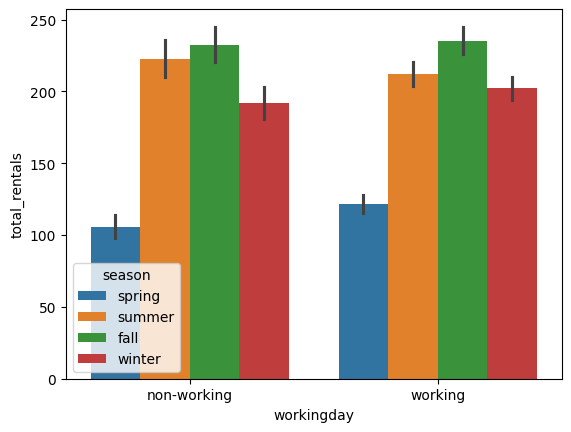

In [ ]:
sns.barplot(x='workingday', y='total_rentals', hue='season', data=yulu)

In [ ]:
yulu['weather'].value_counts()

,count
weather,
clear or cloudy,7192
misty and cloudy,2834
"thunderstorm, light rain or snow",859
"fog, heavy rain, ice pellets or snow",1


In [ ]:
yulu.groupby('weather')['total_rentals'].sum()

,total_rentals
weather,
clear or cloudy,1476063
"fog, heavy rain, ice pellets or snow",164
misty and cloudy,507160
"thunderstorm, light rain or snow",102089


<Axes: xlabel='season', ylabel='total_rentals'>

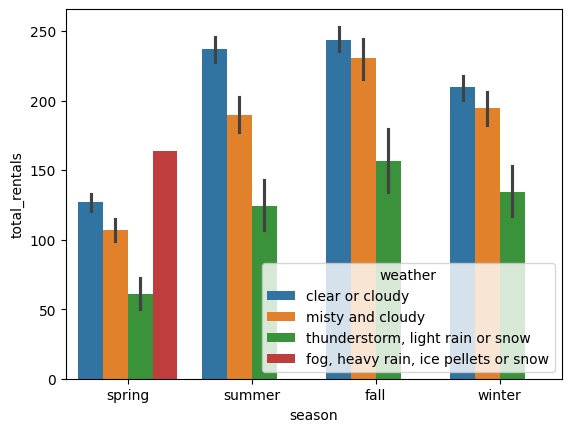

In [ ]:
sns.barplot(x='season', y='total_rentals', hue='weather', data=yulu)

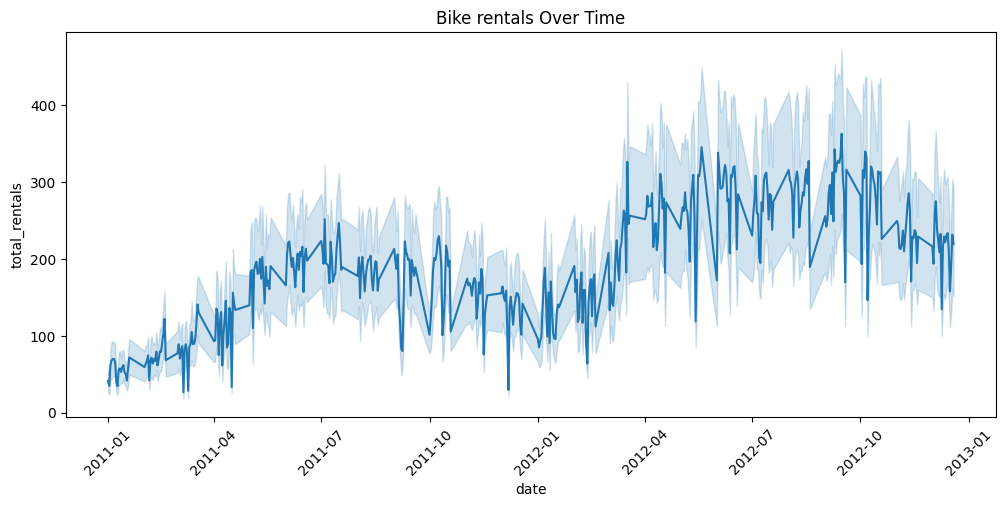

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=yulu, x='date', y='total_rentals')
plt.title('Bike rentals Over Time')
plt.xticks(rotation=45)
plt.show()

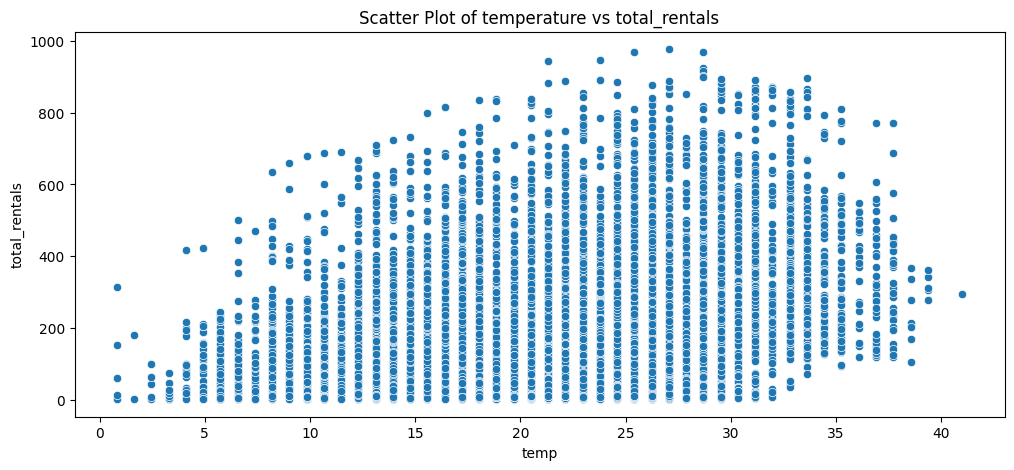

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=yulu, x='temp', y='total_rentals')
plt.title('Scatter Plot of temperature vs total_rentals')
plt.show()

In [ ]:
yulu.groupby('temp')['total_rentals'].sum().sort_values(ascending=False).head()

,total_rentals
temp,
28.70,110029
26.24,105279
29.52,98025
24.60,92501
30.34,90655


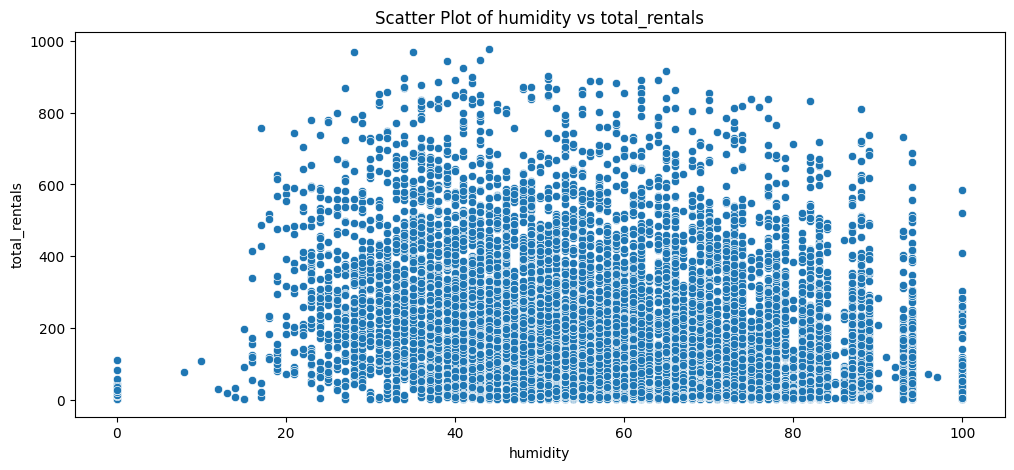

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=yulu, x='humidity', y='total_rentals')
plt.title('Scatter Plot of humidity vs total_rentals')
plt.show()

In [ ]:
yulu.groupby('humidity')['total_rentals'].sum().sort_values(ascending=False)

,total_rentals
humidity,
46,61231
55,53409
49,52893
43,51267
62,50103
...,...
96,71
97,64
14,38


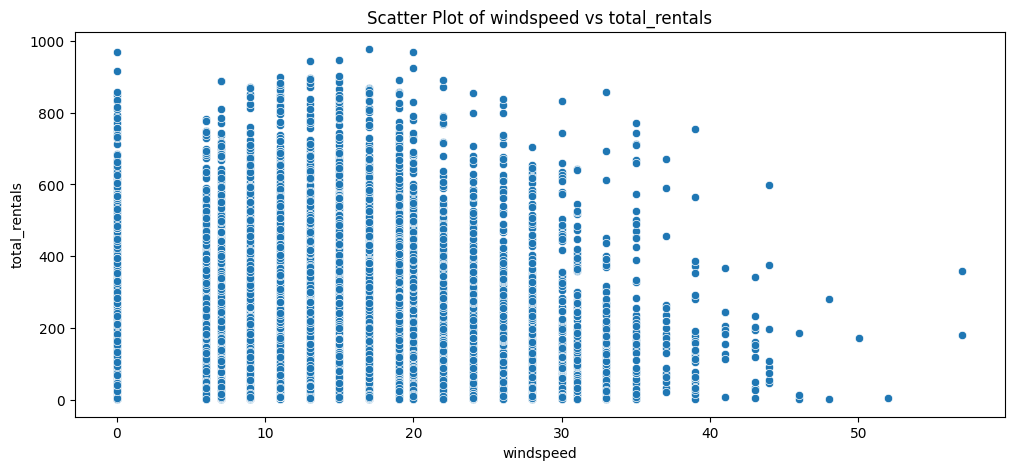

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=yulu, x='windspeed', y='total_rentals')
plt.title('Scatter Plot of windspeed vs total_rentals')
plt.show()

In [ ]:
yulu.groupby('windspeed')['total_rentals'].sum().sort_values(ascending=False).head()

,total_rentals
windspeed,
11.0014,213791
0.0000,211526
12.9980,210744
15.0013,202611
8.9981,196723


In [ ]:
yulu.groupby('windspeed')['total_rentals'].sum().sort_values(ascending=False).tail()

,total_rentals
windspeed,
56.9969,539
47.9988,281
46.0022,202
50.0021,171
51.9987,5


**Which variables are significant in predicting the demand for shared electric cycles in the Indian market**

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
yulu['weather'].value_counts()

,count
weather,
clear or cloudy,7192
misty and cloudy,2834
"thunderstorm, light rain or snow",859
"fog, heavy rain, ice pellets or snow",1


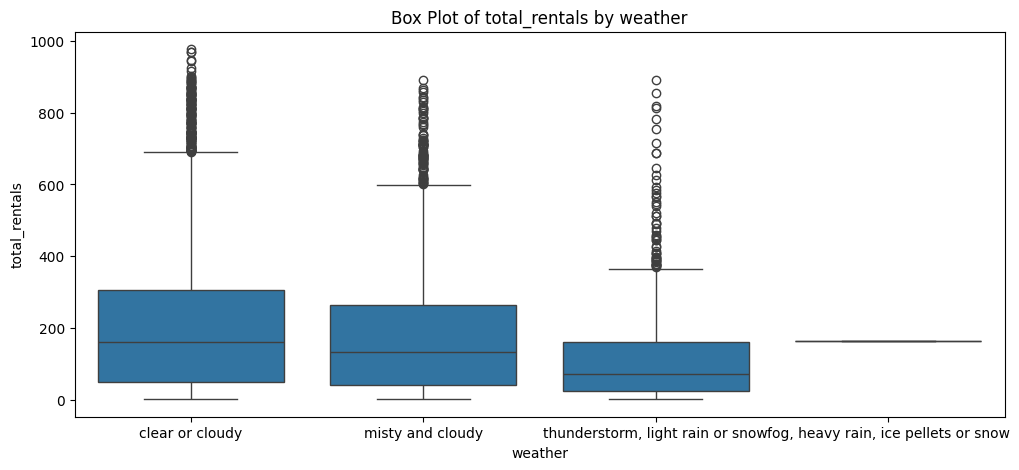

In [ ]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=yulu, x='weather', y='total_rentals')
plt.title('Box Plot of total_rentals by weather')
plt.show()

In [ ]:
yulu_new = yulu[~(yulu["weather"]=='fog, heavy rain, ice pellets or snow')]

In [ ]:
test_1=yulu_new[yulu_new["weather"]=='clear or cloudy'][["total_rentals"]]
test_2=yulu_new[yulu_new["weather"]=='misty and cloudy'][["total_rentals"]]
test_3=yulu_new[yulu_new["weather"]=='thunderstorm, light rain or snow'][["total_rentals"]]

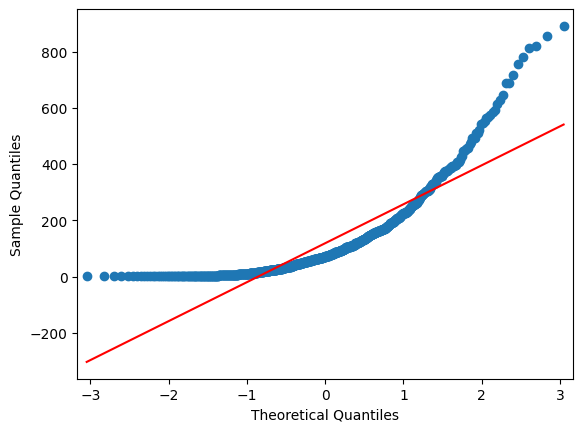

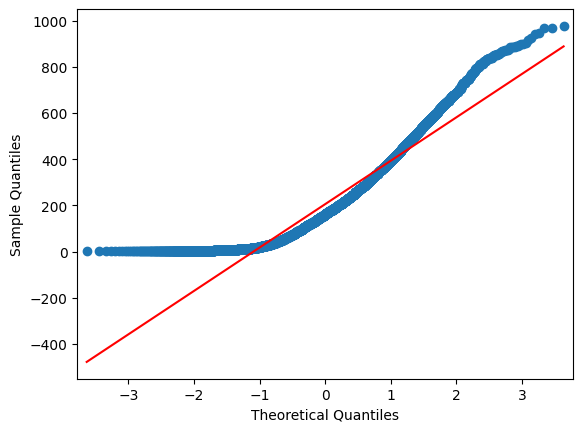

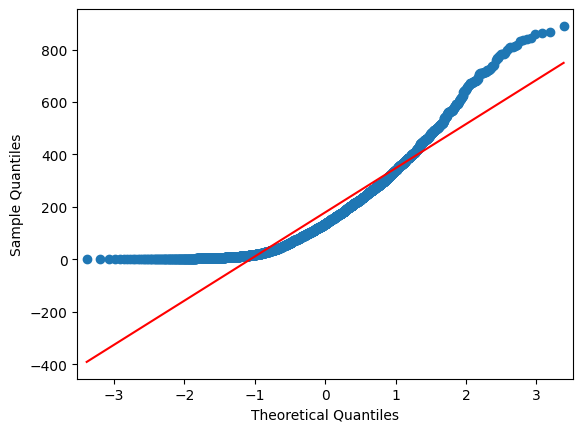

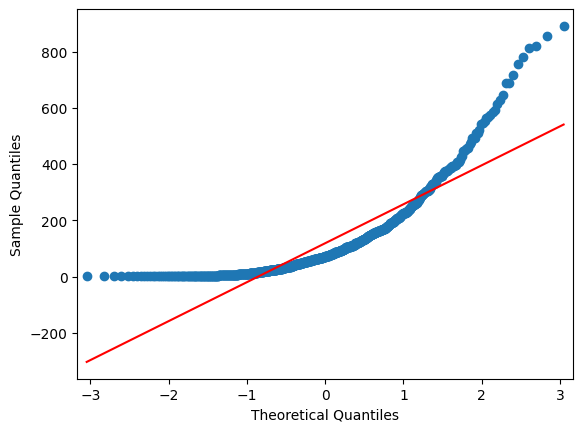

In [ ]:
#normality test qq plot, this output shows its not gaussian, since the percentile of sample is not
# intact with line of gaussian distribution
from statsmodels.graphics.gofplots import qqplot
qqplot(test_1["total_rentals"],line="s")
qqplot(test_2["total_rentals"],line="s")
qqplot(test_3["total_rentals"],line="s")

In [ ]:
#equal variance test - Levenes test
#ho:variance is equal
#ha:variance is not equal
from scipy.stats import levene

lstat,pvalue=levene(test_1["total_rentals"],test_2["total_rentals"],test_3["total_rentals"])

print(pvalue)

if pvalue<0.05:
  print("reject Ho,variance is not equal ")
else:
  print("fail to reject Ho,variance is equal ")

6.198278710731511e-36
reject Ho,variance is not equal 


In [ ]:
from scipy.stats import kruskal

In [ ]:
stat, pval = kruskal(test_1,test_2,test_3)
print('t-stat:', stat)
print('pval:', pval)
alpha = 0.05
if pval < alpha:
    print("Reject the Null Hypothesis (H0). There is a significant difference in bicycle demand across different weather conditions.")
else:
    print("Fail to reject the Null Hypothesis (H0). There is no significant difference in bicycle demand across different weather conditions.")

t-stat: [204.95566833]
pval: [3.12206618e-45]
Reject the Null Hypothesis (H0). There is a significant difference in bicycle demand across different weather conditions.


**Hypothesis Testing 3,
Ho : Season has no effect on bike rentals,
Ha: Season has effect on bike rentals bold text**

In [ ]:
yulu_new['season'].value_counts()

,count
season,
winter,2734
summer,2733
fall,2733
spring,2685


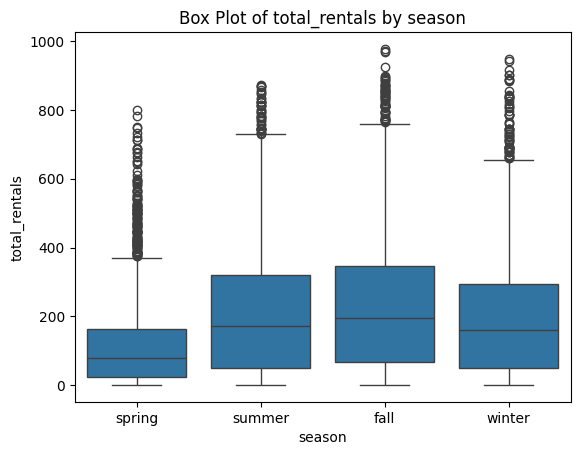

In [ ]:
sns.boxplot(data=yulu, x='season', y='total_rentals')
plt.title('Box Plot of total_rentals by season')
plt.show()

In [ ]:
s1=yulu_new[yulu_new["season"]=='winter'][["total_rentals"]]
s2=yulu_new[yulu_new["season"]=='fall'][["total_rentals"]]
s3=yulu_new[yulu_new["season"]=='summer'][["total_rentals"]]
s4=yulu_new[yulu_new["season"]=='spring'][["total_rentals"]]

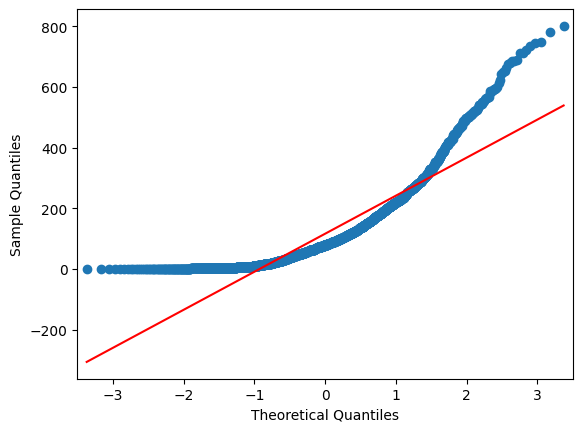

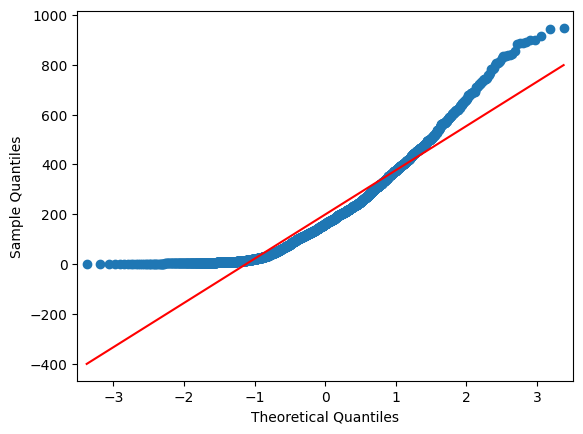

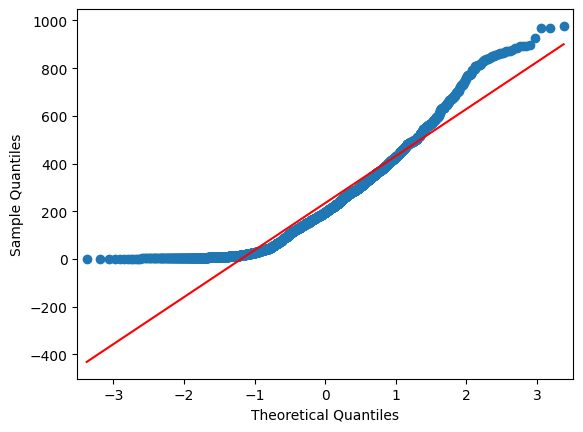

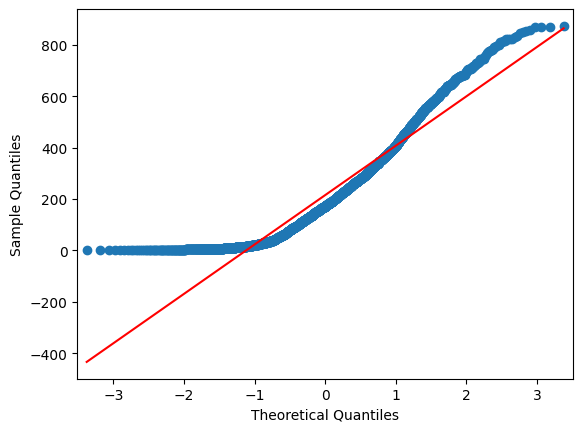

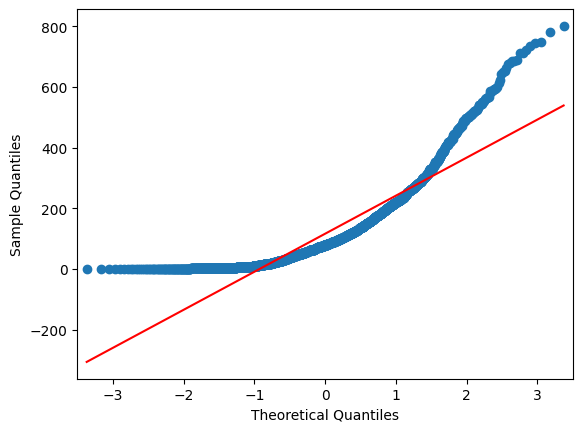

In [ ]:
qqplot(s1["total_rentals"],line="s")
qqplot(s2["total_rentals"],line="s")
qqplot(s3["total_rentals"],line="s")
qqplot(s4["total_rentals"],line="s")

In [ ]:
lstat,pvalue=levene(s1["total_rentals"],s2["total_rentals"],s3["total_rentals"],s4["total_rentals"])
print(pvalue)
if pvalue<0.05:
  print("reject Ho,variance is not equal ")
else:
  print("fail to reject Ho,variance is equal ")

1.1170990373788981e-118
reject Ho,variance is not equal 


In [ ]:
stat1, pval1 = kruskal(s1,s2,s3,s4)
print('t-stat:', stat1)
print('pval:', pval1)
alpha = 0.05
if pval1 < alpha:
    print("Reject the Null Hypothesis (H0).Season has a effect on bike rentals")
else:
    print("Fail to reject the Null Hypothesis (H0).Season has no effect on bike rentals")

t-stat: [699.88214176]
pval: [2.2263613e-151]
Reject the Null Hypothesis (H0).Season has a effect on bike rentals


**Working Day has effect on number of electric cycles rented**

In [ ]:
yulu.groupby('workingday')['total_rentals'].sum()

,total_rentals
workingday,
non-working,654872
working,1430604


In [ ]:
workday_data = yulu_new[yulu_new['workingday']== 'working']
nonworkday_data = yulu_new[yulu_new['workingday']== 'non-working']


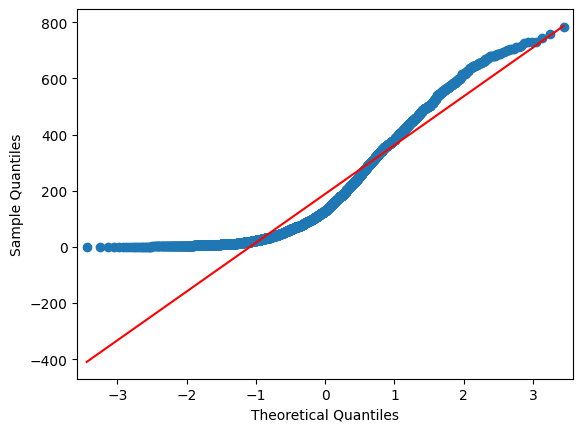

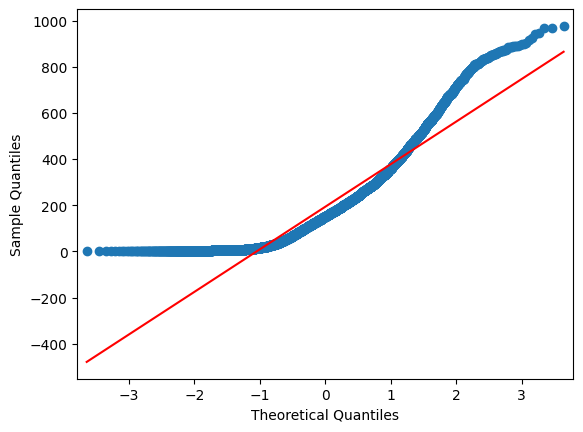

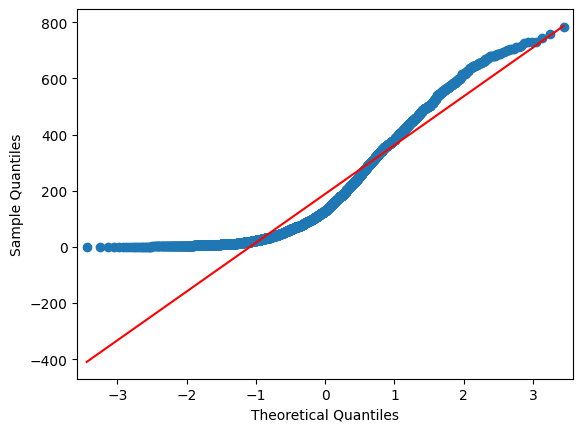

In [ ]:
qqplot(workday_data['total_rentals'],line="s")
qqplot(nonworkday_data['total_rentals'],line="s")

In [ ]:
lstat1 ,pvalue1 =levene(workday_data["total_rentals"],nonworkday_data["total_rentals"])
print(pvalue1)
if pvalue<0.05:
  print("reject Ho,variance is not equal ")
else:
  print("fail to reject Ho,variance is equal ")

0.9489054295190451
reject Ho,variance is not equal 


In [ ]:
stat2, pval2 = kruskal(workday_data['total_rentals'],nonworkday_data['total_rentals'])
print('t-stat:', stat2)
print('pval:', pval2)
alpha = 0.05
if pval2 < alpha:
    print("Reject the Null Hypothesis (H0). Working day has effect on number of electric cycles rented")
else:
    print("Fail to reject the Null Hypothesis (H0).Working day has no effect on number of electric cycles rented")

t-stat: 0.0017343818699882354
pval: 0.9667809735992525
Fail to reject the Null Hypothesis (H0).Working day has no effect on number of electric cycles rented


**Holiday Analysis**

In [ ]:
yulu.groupby('holiday')['total_rentals'].sum()

,total_rentals
holiday,
holiday,57808
non-holiday,2027668


In [ ]:
yulu[yulu.holiday == 'holiday'].groupby(yulu.date).count().holiday.count()

13

**No. of cycles rented similar or different in different seasons**

In [ ]:
yulu_new.groupby('season')['total_rentals'].sum()

,total_rentals
season,
fall,640662
spring,312334
summer,588282
winter,544034


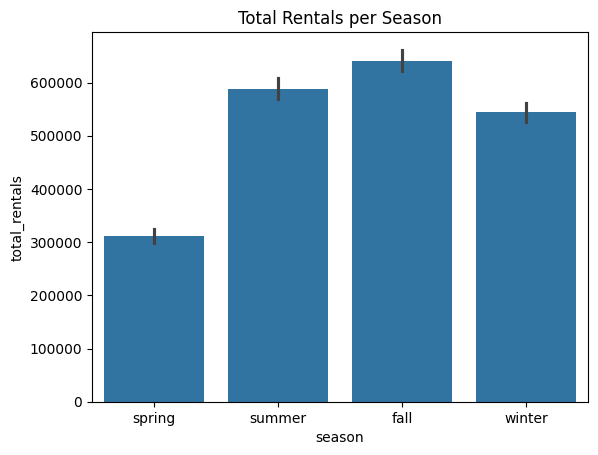

In [ ]:
sns.barplot(x='season', y='total_rentals', data=yulu_new, estimator=sum)
plt.title('Total Rentals per Season')
plt.show()

**No. of cycles rented similar or different in different weather**

In [ ]:
yulu.groupby('weather')['total_rentals'].sum()

,total_rentals
weather,
clear or cloudy,1476063
"fog, heavy rain, ice pellets or snow",164
misty and cloudy,507160
"thunderstorm, light rain or snow",102089


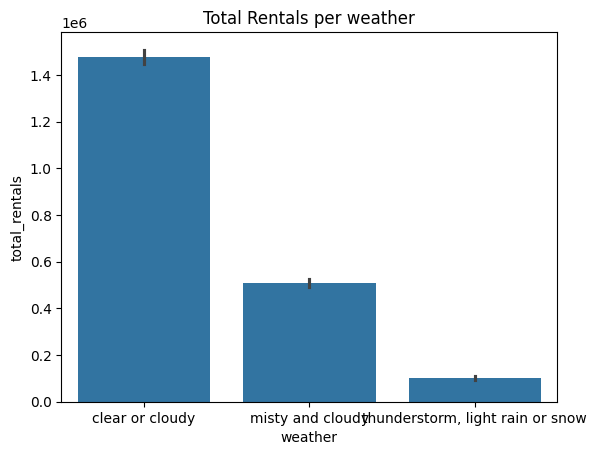

In [ ]:
sns.barplot(x='weather', y='total_rentals', data=yulu_new, estimator=sum)
plt.title('Total Rentals per weather')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
yulu_new['season_encoded'] = label_encoder.fit_transform(yulu_new['season'])
yulu_new['weather_encoded'] = label_encoder.fit_transform(yulu_new['weather'])
yulu_new['workingday_encoded'] = label_encoder.fit_transform(yulu_new['workingday'])
yulu_new['holiday_encoded'] = label_encoder.fit_transform(yulu_new['holiday'])


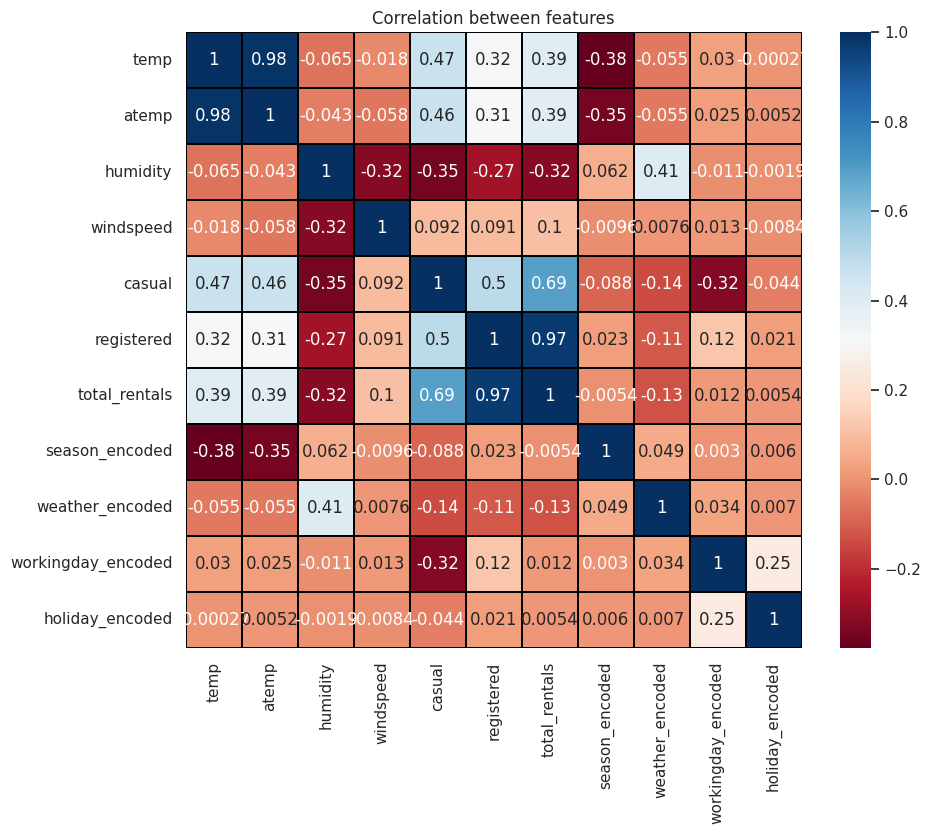

In [ ]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10,8))

corr = yulu_new.select_dtypes(include=['number']).corr()


sns.heatmap(corr, linewidths=0.01, square=True, annot=True, cmap="RdBu", linecolor="black")
#sns.heatmap(correlation_values, vmax = .6, linewidths=0.01, square=True, annot=True, cmap="RdBu", linecolor="black")
plt.title('Correlation between features');